# Logistic Regression

### import libs

In [123]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import  accuracy_score
from sklearn.inspection import DecisionBoundaryDisplay


### iris features

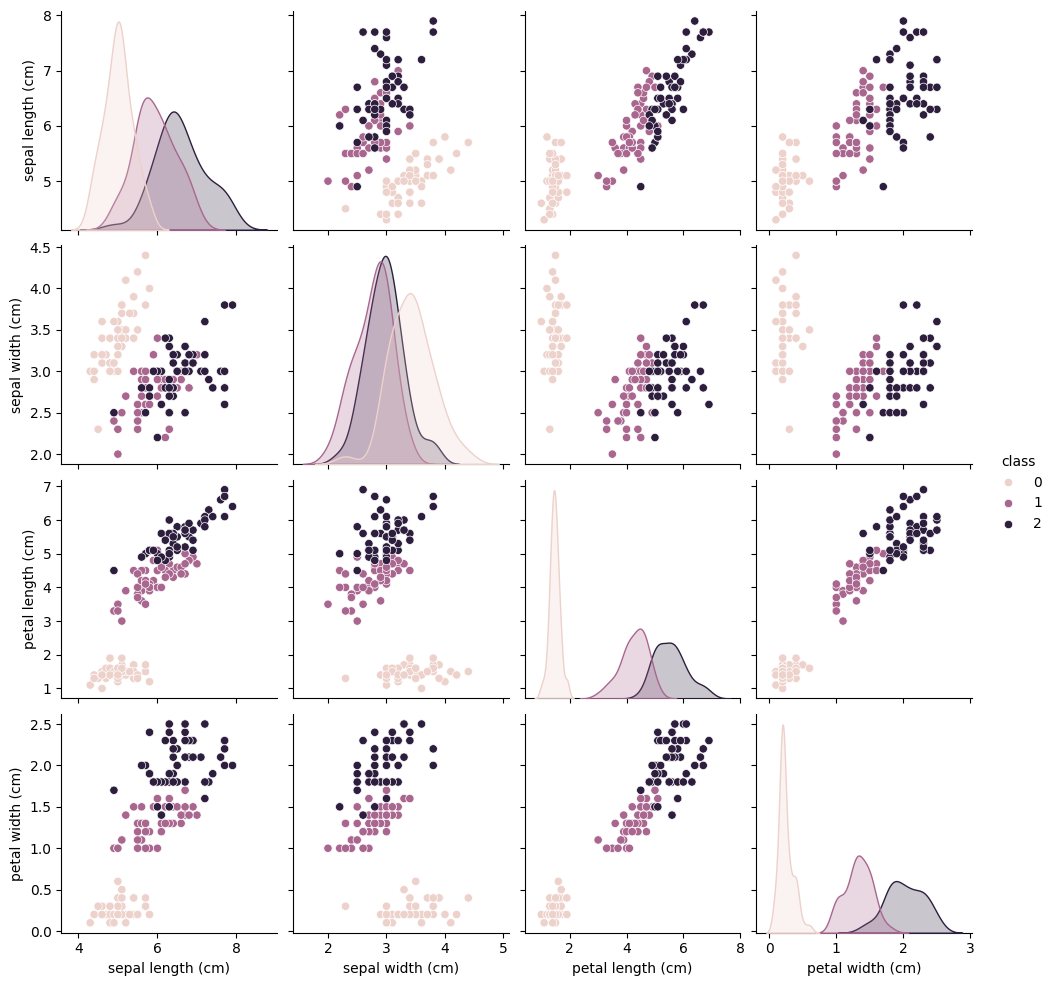

In [124]:
dataset = load_iris()
X = pd.DataFrame(dataset.data,columns=dataset.feature_names)
y = pd.DataFrame(dataset.target, columns=["class"])

X_cloned = X.copy()
X_cloned['class'] = y

sns.pairplot(X_cloned,hue="class")
plt.show()

### normalizing function
using MinMaxScaler from sklearn preprocessing

In [125]:
scaler = MinMaxScaler() #default 0-1

def normalizing(X):
    return scaler.fit_transform(X)

### split and normalize
we can feature selection like: [:, 1].reshape(-1, 1) for single feature or [:, 2:4] for fropetal length and petal width

In [126]:
X_Selected_featured = X[['sepal width (cm)', 'petal length (cm)']]

X_train, X_test, y_train, y_test = train_test_split(X_Selected_featured, y, test_size=0.2)

X_train_normalized = normalizing(X_train)
X_test_normalized = normalizing(X_test)

### Fit model using Logistic Regression
**OvR (One-vs-Rest)** : Trains separate binary classifiers for each class <br/>
**Softmax (Multinomial Logistic Regression)** : Uses a single model with the softmax function to compute probabilities for all classes at once

In [127]:
model = LogisticRegression().fit(X_train_normalized, y_train["class"])

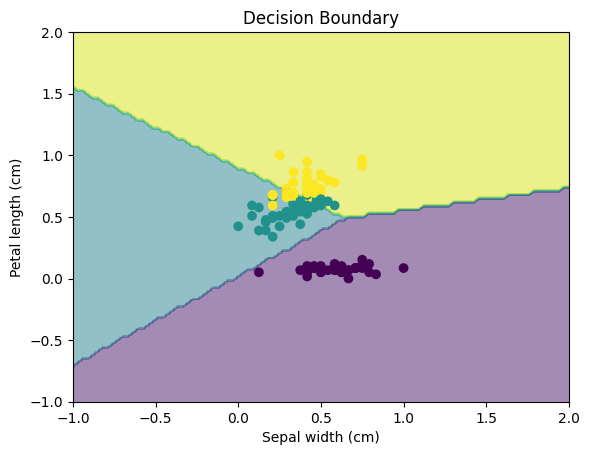

In [128]:
disp = DecisionBoundaryDisplay.from_estimator(model, X_train_normalized, alpha=0.5)
scatter = plt.scatter(X_train_normalized[:,0], X_train_normalized[:,1], c=y_train["class"])
plt.xlabel("Sepal width (cm)")
plt.ylabel("Petal length (cm)")
plt.title("Decision Boundary")
plt.show()

### Predict & Result

In [130]:
predictedLabels = model.predict(X_test_normalized)
accuracy = accuracy_score(y_test["class"], predictedLabels)
print(f"Accuracy: {accuracy*100:.2f}%")


Accuracy: 96.67%
